In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [28]:
df = pd.read_csv('datav.csv')
df_ireland = pd.read_csv('ireland.csv')
df_uk = pd.read_csv('UK.csv')
df_b = pd.read_csv('Netherlands.csv')
df_h = pd.read_csv('Belgium.csv')
df_global = pd.read_csv('worldwide-aggregated.csv')

In [33]:
confirmed = df['cases'].sum()
deaths = df['deaths'].sum()

confirmed_ireland = df_ireland['cases'].sum()
deaths_ireland = df_ireland['deaths'].sum()

confirmed_uk = df_uk['cases'].sum()
deaths_uk = df_uk['deaths'].sum()

confirmed_b = df_b['cases'].sum()
deaths_b = df_b['deaths'].sum()

confirmed_h = df_h['cases'].sum()
deaths_h = df_h['deaths'].sum()

confirmed_global = df_global['Confirmed'].sum()
deaths_global = df_global['Deaths'].sum()

In [88]:
dates = df_uk['dateRep']
confirem_list_uk = []
death_list_uk = []
active_list_uk = []
mortality_rate_uk = []
inflaction_rate_uk = []
days_uk = []
total_uk = 0
for i in range(len(dates)):
    confirem_day_uk = df_uk.loc[len(dates)-i-1]['cases']
    death_day_uk = df_uk.loc[len(dates)-i-1]['deaths']
    days_uk.append(len(dates) - i)
    confirem_list_uk.append(confirem_day_uk)
    death_list_uk.append(death_day_uk)
#     active_list_uk.append(confirem_day_uk - death_day_uk)
    if total_uk == 0:
        mortality_rate_uk.append(0)
        inflaction_rate_uk.append(0)
    else:
        mortality_rate_uk.append(death_day_uk/total_uk)
        inflaction_rate_uk.append(confirem_day_uk/total_uk)
    total_uk += confirem_day_uk
    
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d
uk_daily_increase = daily_increase(confirem_list_uk)

In [89]:
dates = df_b['dateRep']
confirem_list_b = []
death_list_b = []
active_list_b = []
mortality_rate_b = []
inflaction_rate_b = []
days_b = []
total_b = 0
for i in range(len(dates)):
    confirem_day_b = df_b.loc[len(dates)-i-1]['cases']
    death_day_b = df_b.loc[len(dates)-i-1]['deaths']
    days_b.append(len(dates) - i)
    confirem_list_b.append(confirem_day_b)
    death_list_b.append(death_day_b)
#     active_list_b.append(confirem_day_b - death_day_b)
    if total_b == 0:
        mortality_rate_b.append(0)
        inflaction_rate_b.append(0)
    else:
        mortality_rate_b.append(death_day_b/total_b)
        inflaction_rate_b.append(confirem_day_b/total_b)
    total_b += confirem_day_b
    
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d
b_daily_increase = daily_increase(confirem_list_b)

In [90]:
dates = df_h['dateRep']
confirem_list_h = []
death_list_h = []
active_list_h = []
mortality_rate_h = []
inflaction_rate_h = []
days_h = []
total_h = 0
for i in range(len(dates)):
    confirem_day_h = df_h.loc[len(dates)-i-1]['cases']
    death_day_h = df_h.loc[len(dates)-i-1]['deaths']
    days_h.append(len(dates) - i)
    confirem_list_h.append(confirem_day_h)
    death_list_h.append(death_day_h)
#     active_list_h.append(confirem_day_h - death_day_h)
    if total_h == 0:
        mortality_rate_h.append(0)
        inflaction_rate_h.append(0)
    else:
        mortality_rate_h.append(death_day_h/total_h)
        inflaction_rate_h.append(confirem_day_h/total_h)
    total_h += confirem_day_h
    
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d
h_daily_increase = daily_increase(confirem_list_h)

In [87]:
dates = df['dateRep']
confirem_list = []
death_list = []
active_list = []
inflaction_rate = []
mortality_rate = []
days = []
total = 0
for i in range(len(dates)):
    confirem_day = df.loc[len(dates)-i-1]['cases']
    death_day = df.loc[len(dates)-i-1]['deaths']
    days.append(len(dates) - i)
    confirem_list.append(confirem_day)
    death_list.append(death_day)
    if total == 0:
        mortality_rate.append(0)
        inflaction_rate.append(0)
    else:
        mortality_rate.append(death_day/total)
        inflaction_rate.append(confirem_day/total)
    total += confirem_day
print(inflaction_rate)
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d
switzerland_daily_increase = daily_increase(confirem_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 7.0, 0.5, 0.5, 0.3333333333333333, 0.25, 0.23333333333333334, 0.5405405405405406, 0.5263157894736842, 1.4022988505747127, 0.2631578947368421, 0.25757575757575757, 0.12650602409638553, 0.31016042780748665, 0.31020408163265306, 0.3302180685358255, 0.3126463700234192, 0.21231043710972347, 0.6188373804267844, 0.0, 0.20454545454545456, 0.13584905660377358, 0.29169435215946843, 0.2448559670781893, 0.2555785123966942, 0.14711206187263454, 0.14976330512121647, 0.09656893325015596, 0.10524519285470474, 0.10294420424130121, 0.12973679298114615, 0.08658294778585592, 0.08531021897810219]


69
[6, 20, 17, 58, 36, 38, 22]


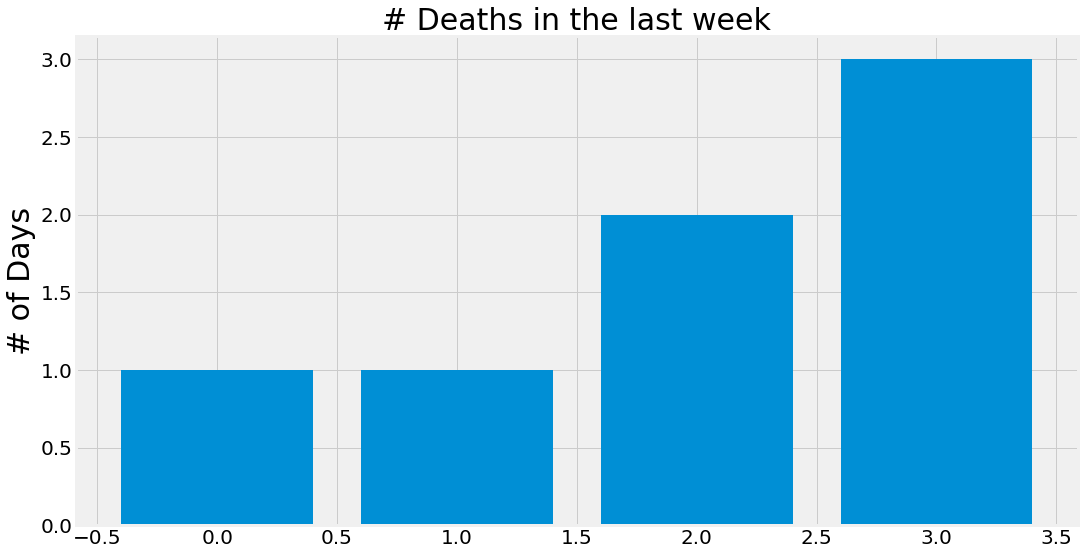

In [118]:
print(len(death_list))
death_list_p = death_list[62:]
print(death_list_p)
x_list = ['10','20','30','30+']
y_list = [1,1,2,3]


global_case = np.array(y_list)
days = [i for i in range(len(x_list))]
days = np.array(days)
plt.figure(figsize=(16, 9))
plt.bar(days, global_case)
plt.title('# Deaths in the last week', size=30)
plt.ylabel('# of Days', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [126]:
#predict

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)


days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]
confirem_list = np.array(confirem_list).reshape(-1, 1)
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, 
                                                                                            confirem_list, 
                                                                                            test_size=0.05, 
                                                                                            shuffle=False)


# transform our data for polynomial regression
poly = PolynomialFeatures(degree=6)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 314.3611165205657
MSE: 131721.93459733392


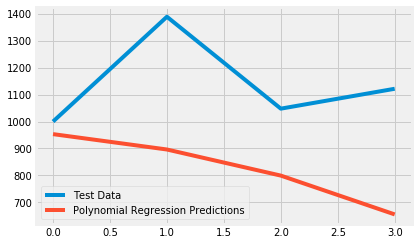

In [127]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 18450.069506924552
MSE: 347326701.0130431


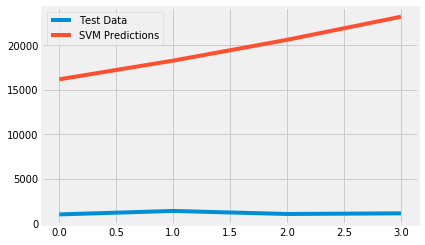

In [128]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [129]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]
bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}
bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   28.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'tol': [0.0001, 0.001, 0.01], 'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001], 'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [130]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 201.5125494785483
MSE: 42370.97182368015


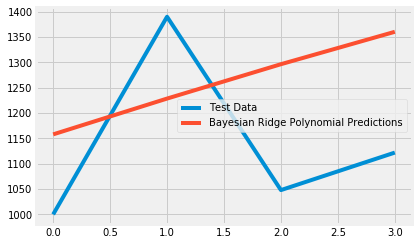

In [131]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

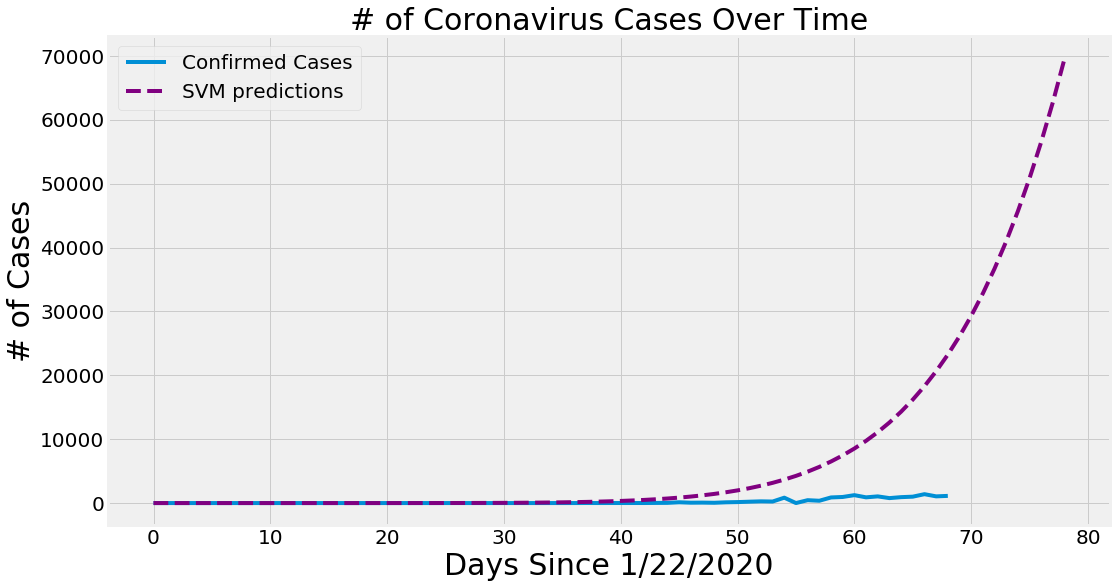

In [133]:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, confirem_list)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

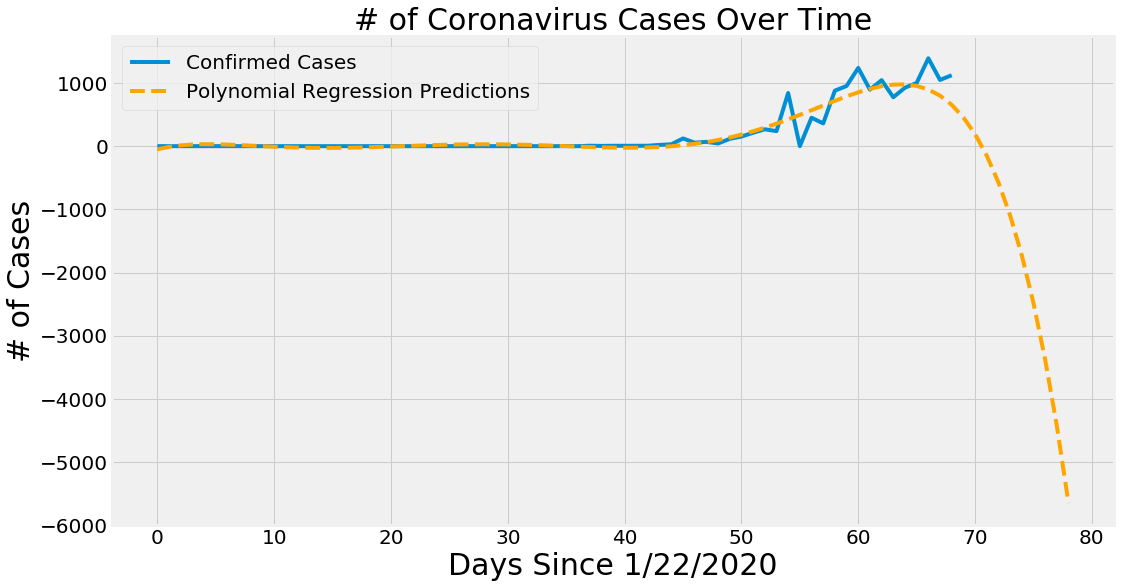

In [134]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, confirem_list)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

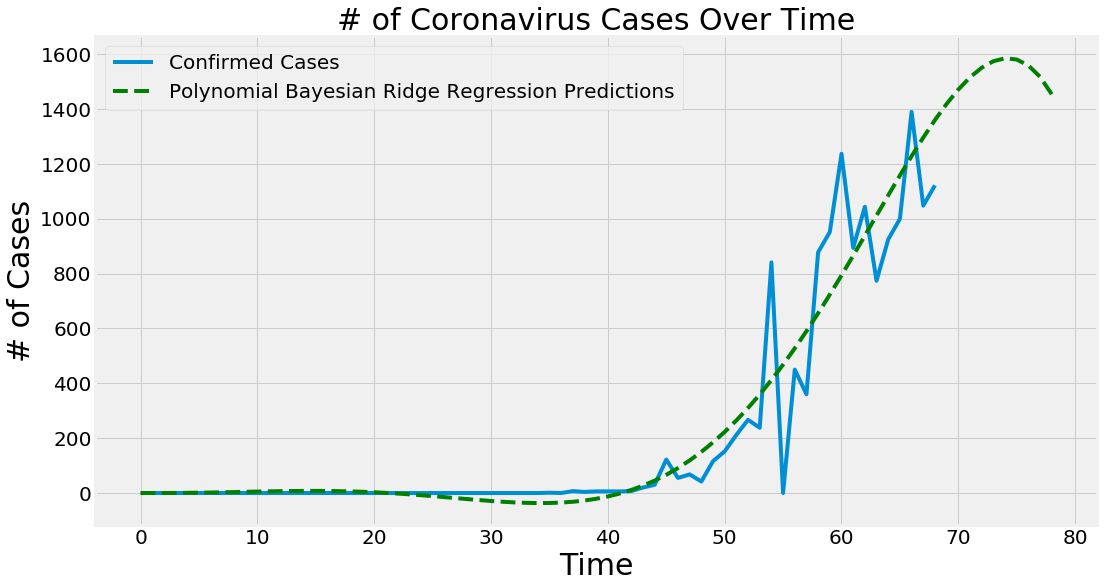

In [135]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, confirem_list)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [91]:
dates = df_ireland['dateRep']
confirem_list1 = []
death_list1 = []
active_list1 = []
mortality_rate1 = []
inflaction_rate1 = []
days1 = []
total1 = 0
for i in range(len(dates)):
    confirem_day1 = df_ireland.loc[len(dates)-i-1]['cases']
    death_day1 = df_ireland.loc[len(dates)-i-1]['deaths']
    days1.append(len(dates) - i)
    confirem_list1.append(confirem_day1)
    death_list1.append(death_day1)
#     active_list1.append(confirem_day1 - death_day1)
    if total1 == 0:
        mortality_rate1.append(0)
        inflaction_rate1.append(0)
    else:
        mortality_rate1.append(death_day1/total1)
        inflaction_rate1.append(confirem_day1/total1)
    total1 += confirem_day1
    
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d
ireland_daily_increase = daily_increase(confirem_list1)

In [92]:
dates = df_global['Date']
confirem_list2 = []
death_list2 = []
active_list2 = []
mortality_rate2 = []
inflaction_rate2 = []
days2 = []
total2 = 0
for i in range(len(dates)):
    confirem_day2 = df_global.loc[len(dates)-i-1]['Confirmed']
    death_day2 = df_global.loc[len(dates)-i-1]['Deaths']
    days2.append(len(dates) - i)
    confirem_list2.append(confirem_day2)
    death_list2.append(death_day2)
#     active_list2.append(confirem_day2 - death_day2)
    if total2 == 0:
        mortality_rate2.append(0)
        inflaction_rate2.append(0)
    else:
        mortality_rate2.append(death_day2/total2)
        inflaction_rate2.append(confirem_day2/total2)
    
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d
global_daily_increase = daily_increase(confirem_list2)

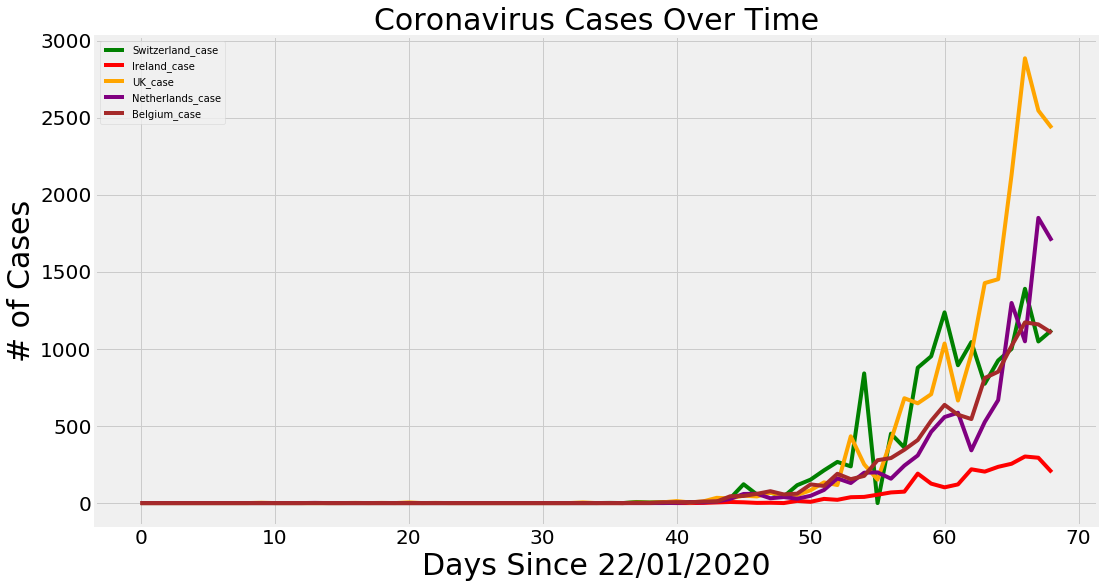

In [70]:
# confirem_list = np.array(confirem_list).reshape(-1, 1)
switzerland_case = []
for i in range(len(confirem_list)-1,-1,-1):
    switzerland_case.append(confirem_list[i])
switzerland_case = np.array(switzerland_case)

ireland_case = []
for i in range(len(confirem_list1)-1,-1,-1):
    ireland_case.append(confirem_list1[i])
ireland_case = np.array(ireland_case)

uk_case = []
for i in range(len(confirem_list_uk)-1,-1,-1):
    uk_case.append(confirem_list_uk[i])
uk_case = np.array(uk_case)

h_case = []
for i in range(len(confirem_list_h)-1,-1,-1):
    h_case.append(confirem_list_h[i])
h_case = np.array(h_case)

b_case = []
for i in range(len(confirem_list_b)-1,-1,-1):
    b_case.append(confirem_list_b[i])
b_case = np.array(b_case)

global_case = np.array(confirem_list2)


days = [i for i in range(len(dates))]
days = np.array(days)

plt.figure(figsize=(16, 9))
plt.plot(days, switzerland_case,color='green', label='Switzerland_case')
plt.plot(days, ireland_case,color='red', label='Ireland_case')
plt.plot(days, uk_case,color='orange', label='UK_case')
plt.plot(days, h_case,color='purple', label='Netherlands_case')
plt.plot(days, b_case,color='brown', label='Belgium_case')
# plt.plot(days, global_case,color='blue', label='global_case')
plt.title('Coronavirus Cases Over Time', size=30)
plt.legend()
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

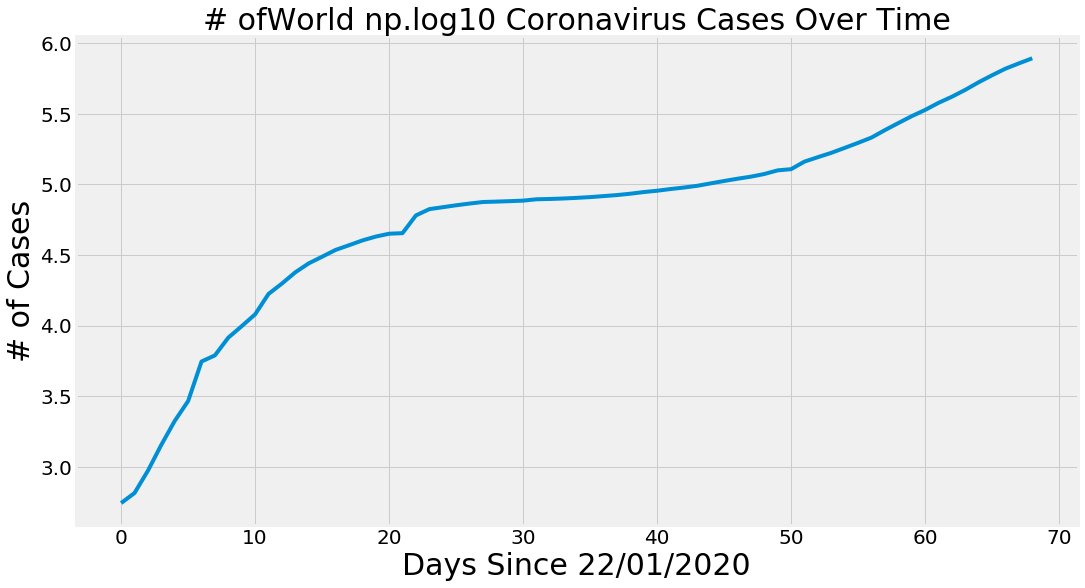

In [71]:

global_case = np.array(confirem_list2)
days = [i for i in range(len(dates))]
days = np.array(days)
plt.figure(figsize=(16, 9))
plt.plot(days, np.log10(global_case))
plt.title('# ofWorld np.log10 Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

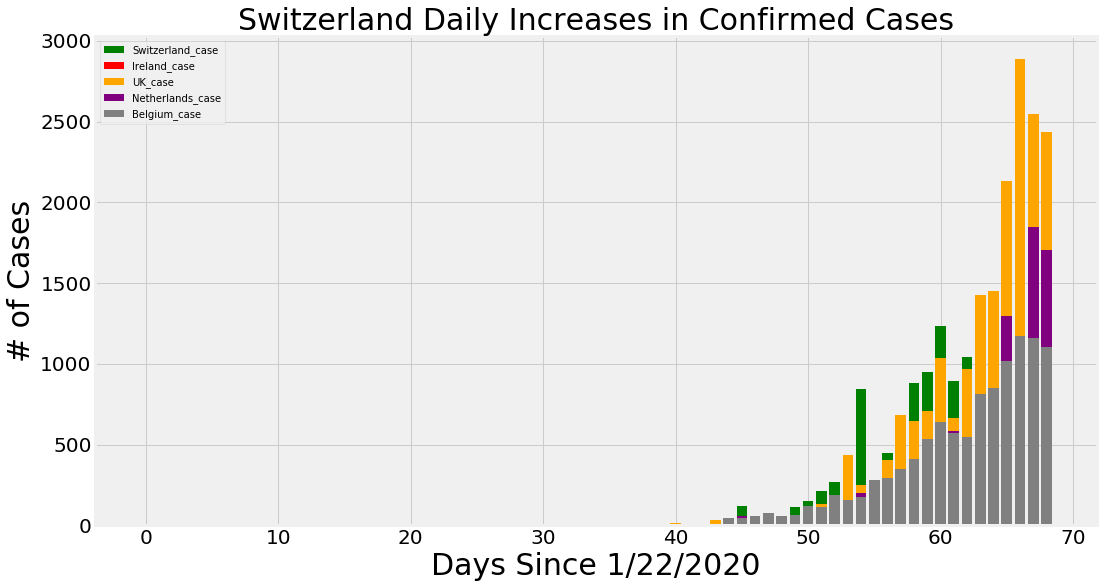

In [72]:
days = [i for i in range(len(dates))]
days = np.array(days)

switzerland_case = []
for i in range(len(confirem_list)-1,-1,-1):
    switzerland_case.append(confirem_list[i])


ireland_case = []
for i in range(len(confirem_list1)-1,-1,-1):
    ireland_case.append(confirem_list1[i])

uk_case = []
for i in range(len(confirem_list_uk)-1,-1,-1):
    uk_case.append(confirem_list_uk[i])
h_case = []
for i in range(len(confirem_list_h)-1,-1,-1):
    h_case.append(confirem_list_h[i])
b_case = []
for i in range(len(confirem_list_b)-1,-1,-1):
    b_case.append(confirem_list_b[i])


# print(len(days))
# print(len(switzerland_case))
# print(len(ireland_case))
# print(len(uk_case))
# print(len(h_case))
# print(len(b_case))
global_case = confirem_list2

plt.figure(figsize=(16, 9))
plt.bar(days, switzerland_case,color='green', label='Switzerland_case')
plt.bar(days, ireland_case,color='red', label='Ireland_case')
plt.bar(days, uk_case,color='orange', label='UK_case')
plt.bar(days, h_case,color='purple', label='Netherlands_case')
plt.bar(days, b_case,color='gray', label='Belgium_case')
#这里最好分开现实，因为Ireland增加的相对较少，所以看不出什么差别，放在一起的话，Ireland就没了

plt.legend()
plt.title('Switzerland Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

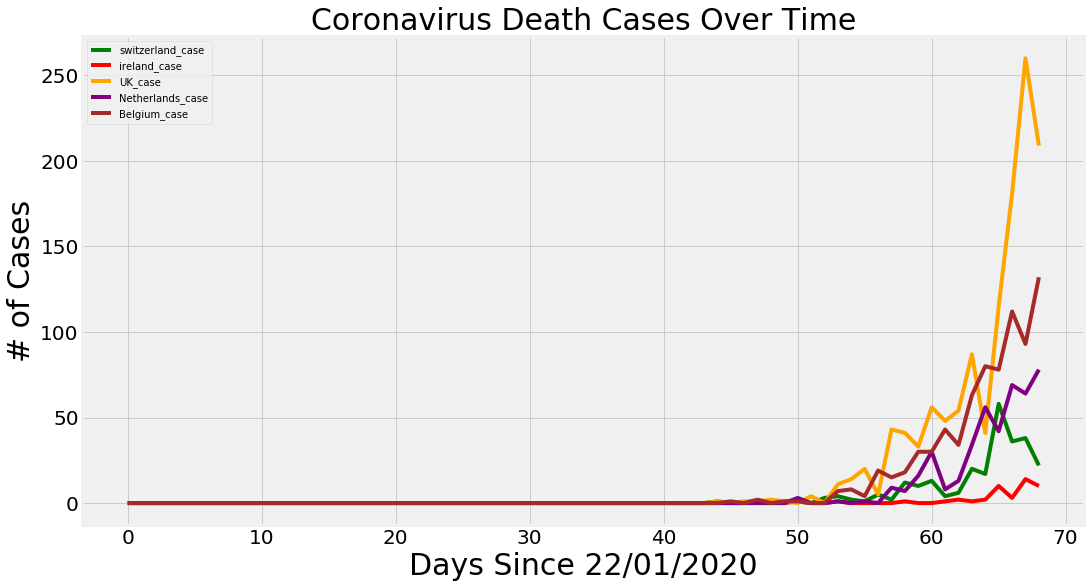

In [51]:
# confirem_list = np.array(confirem_list).reshape(-1, 1)
switzerland_case = []
for i in range(len(death_list)-1,-1,-1):
    switzerland_case.append(death_list[i])
switzerland_case = np.array(switzerland_case)

ireland_case = []
for i in range(len(death_list1)-1,-1,-1):
    ireland_case.append(death_list1[i])
ireland_case = np.array(ireland_case)

uk_case = []
for i in range(len(death_list_uk)-1,-1,-1):
    uk_case.append(death_list_uk[i])
uk_case = np.array(uk_case)

h_case = []
for i in range(len(death_list_h)-1,-1,-1):
    h_case.append(death_list_h[i])
h_case = np.array(h_case)

b_case = []
for i in range(len(death_list_b)-1,-1,-1):
    b_case.append(death_list_b[i])
b_case = np.array(b_case)

global_case = np.array(death_list2)


days = [i for i in range(len(dates))]
days = np.array(days)

plt.figure(figsize=(16, 9))
plt.plot(days, switzerland_case,color='green', label='switzerland_case')
plt.plot(days, ireland_case,color='red', label='ireland_case')
plt.plot(days, uk_case,color='orange', label='UK_case')
plt.plot(days, h_case,color='purple', label='Netherlands_case')
plt.plot(days, b_case,color='brown', label='Belgium_case')
plt.title('Coronavirus Death Cases Over Time', size=30)
plt.legend()
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

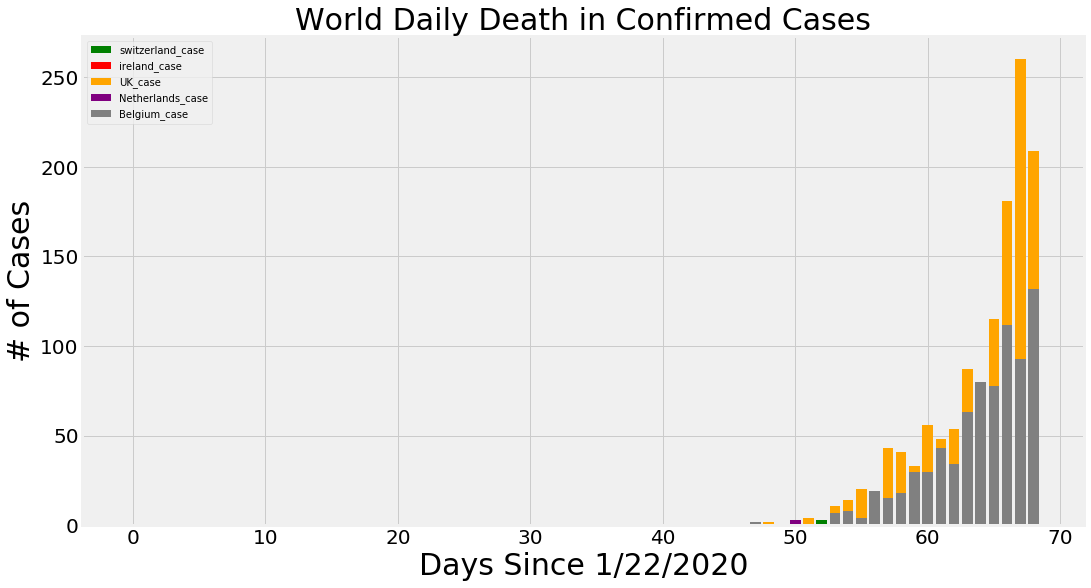

In [52]:
days = [i for i in range(len(dates))]
days = np.array(days)

switzerland_case = []
for i in range(len(death_list)-1,-1,-1):
    switzerland_case.append(death_list[i])


ireland_case = []
for i in range(len(death_list1)-1,-1,-1):
    ireland_case.append(death_list1[i])
    
uk_case = []
for i in range(len(death_list_uk)-1,-1,-1):
    uk_case.append(death_list_uk[i])

h_case = []
for i in range(len(death_list_h)-1,-1,-1):
    h_case.append(death_list_h[i])
    
b_case = []
for i in range(len(death_list_b)-1,-1,-1):
    b_case.append(death_list_b[i])



global_case = death_list2

plt.figure(figsize=(16, 9))
plt.bar(days, switzerland_case,color='green', label='switzerland_case')
plt.bar(days, ireland_case,color='red', label='ireland_case')
plt.bar(days, uk_case,color='orange', label='UK_case')
plt.bar(days, h_case,color='purple', label='Netherlands_case')
plt.bar(days, b_case,color='gray', label='Belgium_case')
plt.legend()
plt.title('World Daily Death in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

34
34
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


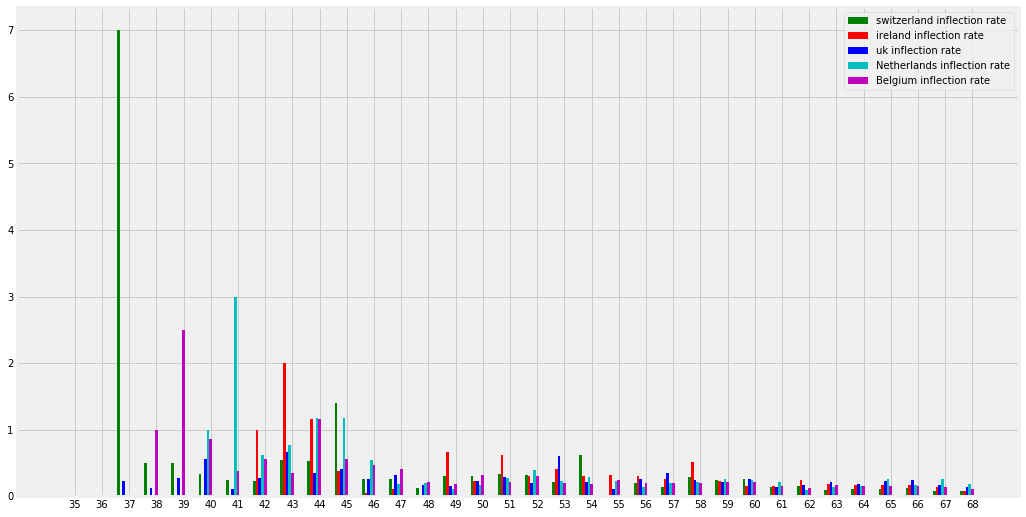

In [111]:
days = [i for i in range(len(dates))][35:]
# days = np.array(days)

switzerland_case = inflaction_rate[35:]

    
Ireland_case = inflaction_rate1[35:]

    
uk_case = inflaction_rate_uk[35:]


h_case = inflaction_rate_h[35:]

    
b_case = inflaction_rate_b[35:]

world = inflaction_rate2[35:]
print(len(switzerland_case))
print(len(Ireland_case))
print(world)

# plt.figure(figsize=(16, 9))
# plt.bar(days, switzerland_case,color='green', label='Switzerland_case')
# plt.bar(days, Ireland_case, label='ireland daily inflection rate',color = 'red')
# plt.legend()
# plt.title('switzerland Daily Death rate', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

plt.figure(figsize=(16, 9))
x = list(range(len(days)))
width = 0.1
plt.bar(x, switzerland_case, width=width, label='switzerland inflection rate',fc = 'green')  
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, Ireland_case, width=width, label='ireland inflection rate',tick_label = days,fc = 'r') 
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, uk_case, width=width, label='uk inflection rate',tick_label = days,fc = 'b')  
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, h_case, width=width, label='Netherlands inflection rate',tick_label = days,fc = 'c') 
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, b_case, width=width, label='Belgium inflection rate',tick_label = days,fc = 'm') 
# for i in range(len(x)):
#     x[i] = x[i] + width
# plt.bar(x, world, width=width, label='world inflection rate',tick_label = days,fc = 'y') 
plt.legend()  
plt.show()  

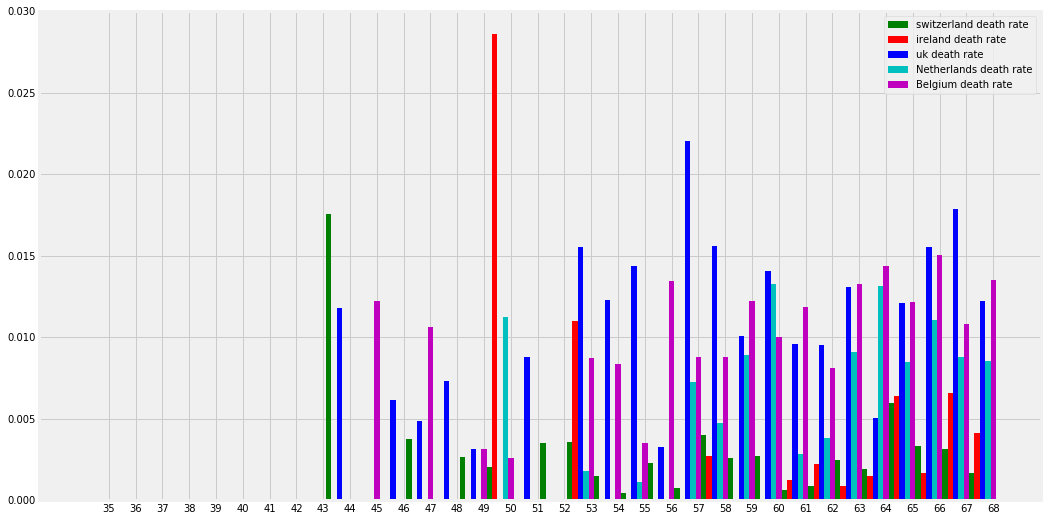

In [113]:
days = [i for i in range(len(dates))][35:]
# days = np.array(days)

switzerland_case = mortality_rate[35:]

    
Ireland_case = mortality_rate1[35:]

    
uk_case = mortality_rate_uk[35:]


h_case = mortality_rate_h[35:]

    
b_case = mortality_rate_b[35:]

# world = inflaction_rate2[35:]



plt.figure(figsize=(16, 9))
x = list(range(len(days)))
width = 0.2
plt.bar(x, switzerland_case, width=width, label='switzerland death rate',fc = 'green')  
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, Ireland_case, width=width, label='ireland death rate',tick_label = days,fc = 'r') 
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, uk_case, width=width, label='uk death rate',tick_label = days,fc = 'b')  
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, h_case, width=width, label='Netherlands death rate',tick_label = days,fc = 'c') 
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, b_case, width=width, label='Belgium death rate',tick_label = days,fc = 'm') 
# for i in range(len(x)):
#     x[i] = x[i] + width
# plt.bar(x, world, width=width, label='world inflection rate',tick_label = days,fc = 'y') 
plt.legend()  
plt.show() 

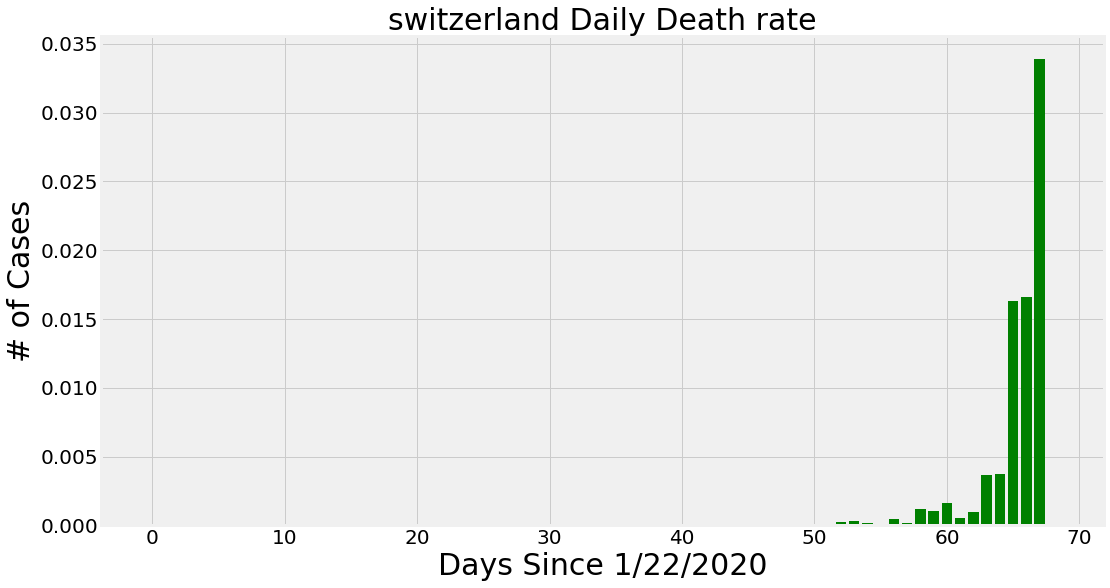

In [64]:
days = [i for i in range(len(dates))]
days = np.array(days)

switzerland_case = []
for i in range(len(mortality_rate)-1,-1,-1):
    switzerland_case.append(mortality_rate[i])

plt.figure(figsize=(16, 9))
plt.bar(days, switzerland_case,color='green', label='Switzerland_case')
plt.title('switzerland Daily Death rate', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

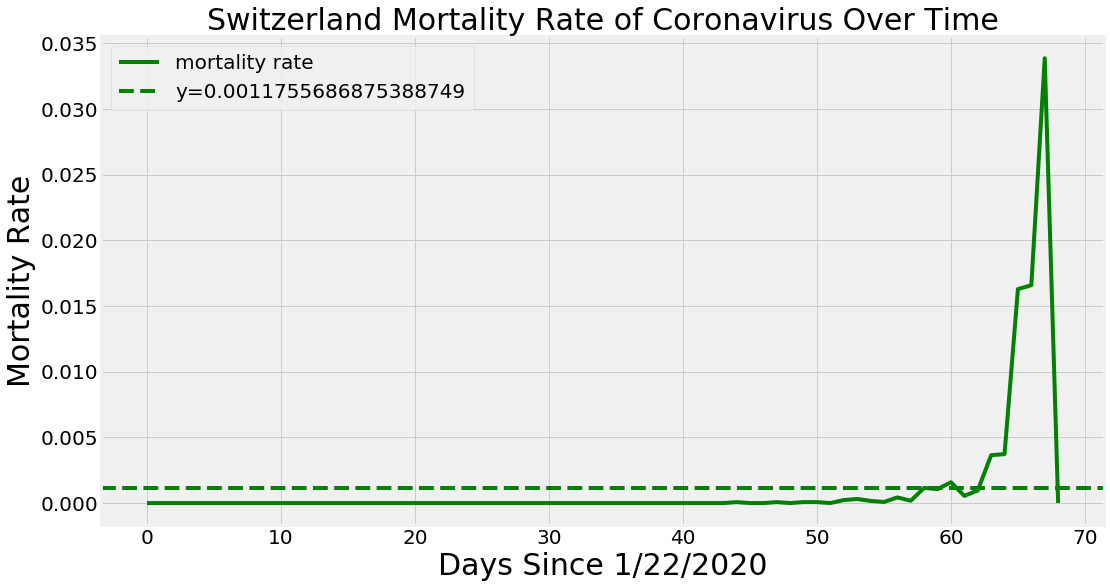

In [56]:
switzerland_case = []
for i in range(len(mortality_rate)-1,-1,-1):
    switzerland_case.append(mortality_rate[i])
switzerland_case_mean = np.mean(switzerland_case)
days = [i for i in range(len(dates))]
days = np.array(days)
plt.figure(figsize=(16, 9))
plt.plot(days, switzerland_case, color='green', label='switzerland_case')
plt.axhline(y = switzerland_case_mean,linestyle='--', color='green')
plt.title('Switzerland Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(switzerland_case_mean)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

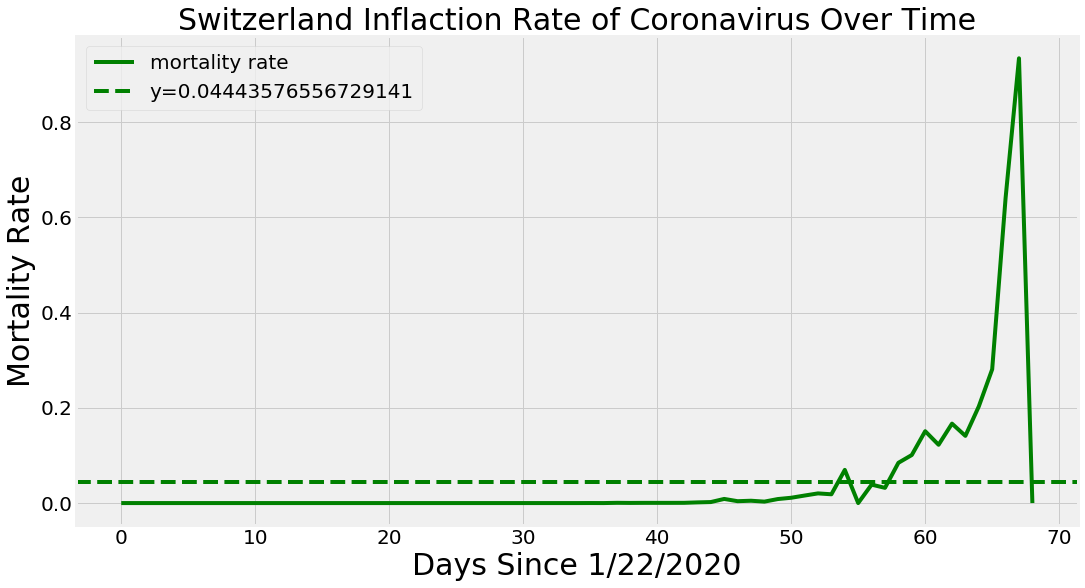

In [57]:
switzerland_case = []
for i in range(len(inflaction_rate)-1,-1,-1):
    switzerland_case.append(inflaction_rate[i])
switzerland_case_mean = np.mean(switzerland_case)
days = [i for i in range(len(dates))]
days = np.array(days)
plt.figure(figsize=(16, 9))
plt.plot(days, switzerland_case, color='green', label='switzerland_case')
plt.axhline(y = switzerland_case_mean,linestyle='--', color='green')
plt.title('Switzerland Inflaction Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(switzerland_case_mean)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

0.0013698641485717076


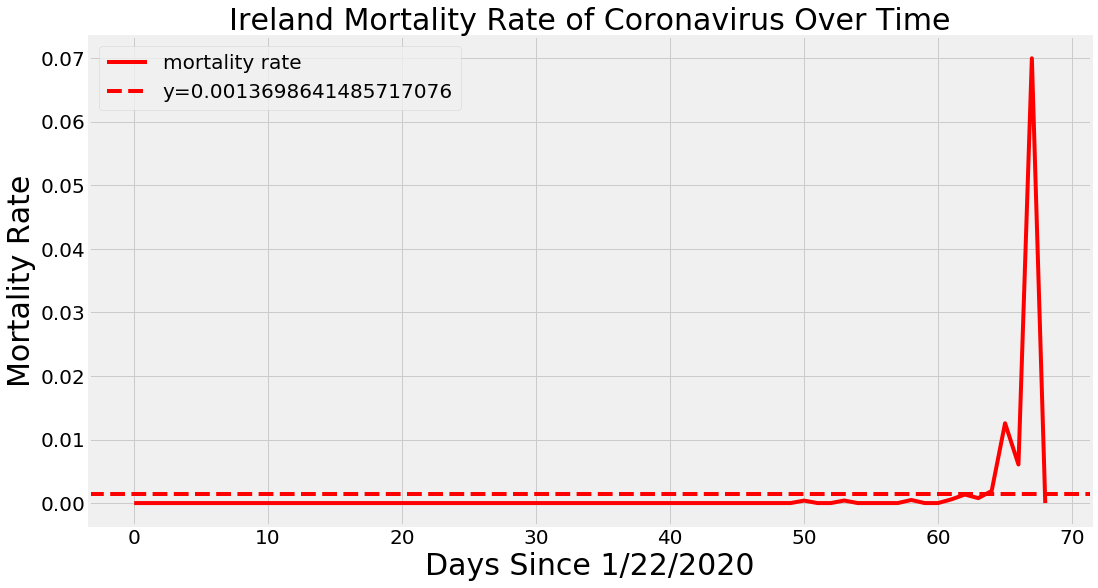

In [58]:
ireland_case = []
for i in range(len(mortality_rate1)-1,-1,-1):
    ireland_case.append(mortality_rate1[i])
ireland_case_mean = np.mean(ireland_case)
print(ireland_case_mean)
days = [i for i in range(len(dates))]
days = np.array(days)
plt.figure(figsize=(16, 9))
plt.plot(days, ireland_case, color='red', label='ireland_case')
plt.axhline(y = ireland_case_mean,linestyle='--', color='red')
plt.title('Ireland Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(ireland_case_mean)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

0.00277612839243918


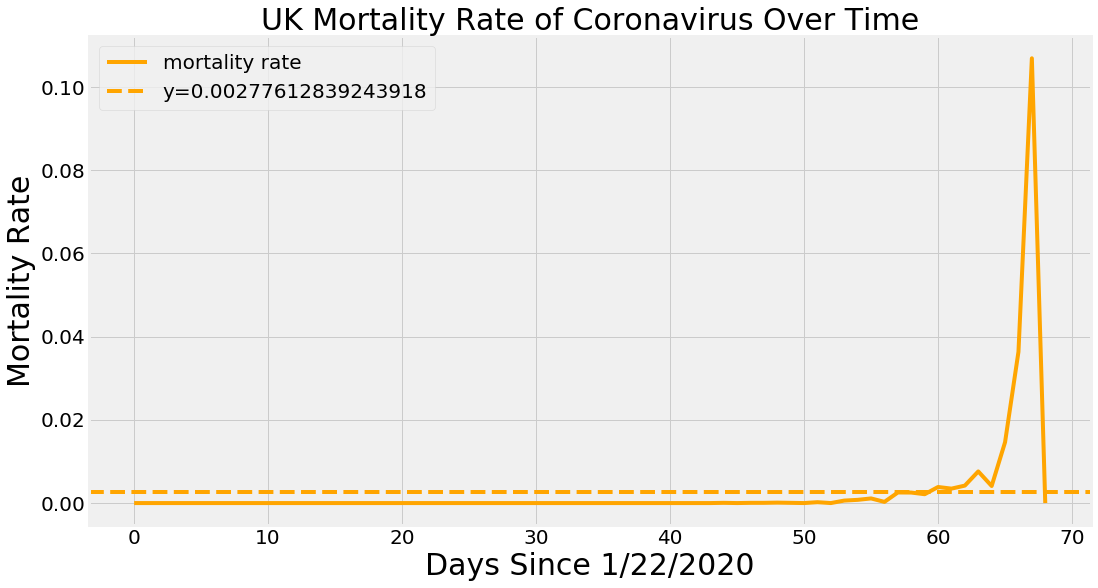

In [59]:
uk_case = []
for i in range(len(mortality_rate_uk)-1,-1,-1):
    uk_case.append(mortality_rate_uk[i])
uk_case_mean = np.mean(uk_case)
print(uk_case_mean)
days = [i for i in range(len(dates))]
days = np.array(days)
plt.figure(figsize=(16, 9))
plt.plot(days, uk_case, color='orange', label='uk_case')
plt.axhline(y = uk_case_mean,linestyle='--', color='orange')
plt.title('UK Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(uk_case_mean)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

0.001327021857314041


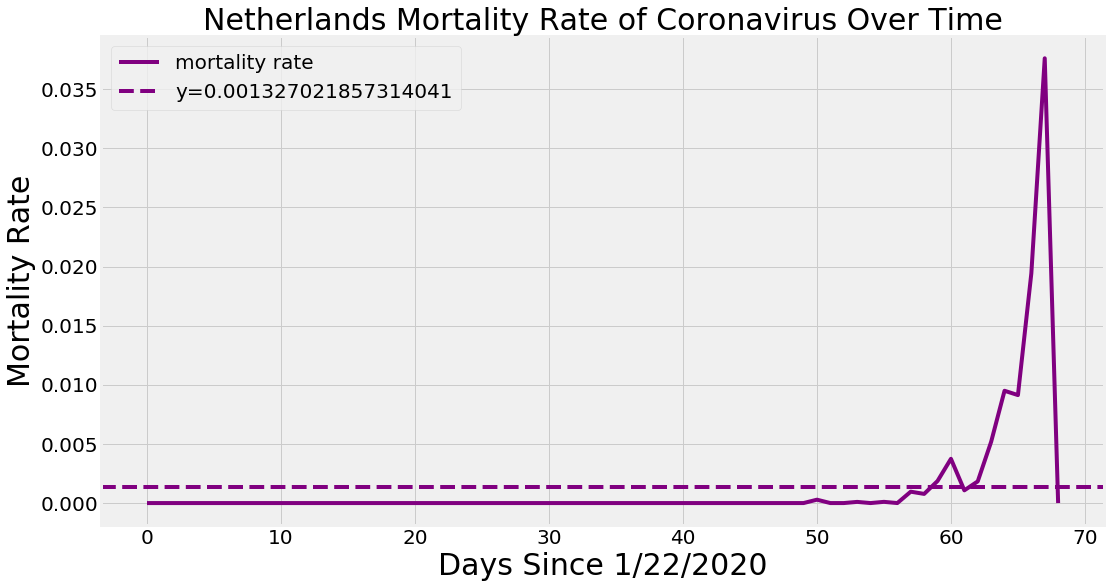

In [60]:
h_case = []
for i in range(len(mortality_rate_h)-1,-1,-1):
    h_case.append(mortality_rate_h[i])
h_case_mean = np.mean(h_case)
print(h_case_mean)
days = [i for i in range(len(dates))]
days = np.array(days)
plt.figure(figsize=(16, 9))
plt.plot(days, h_case, color='purple', label='netherlands_case')
plt.axhline(y = h_case_mean,linestyle='--', color='purple')
plt.title('Netherlands Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(h_case_mean)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

0.003109940293526585


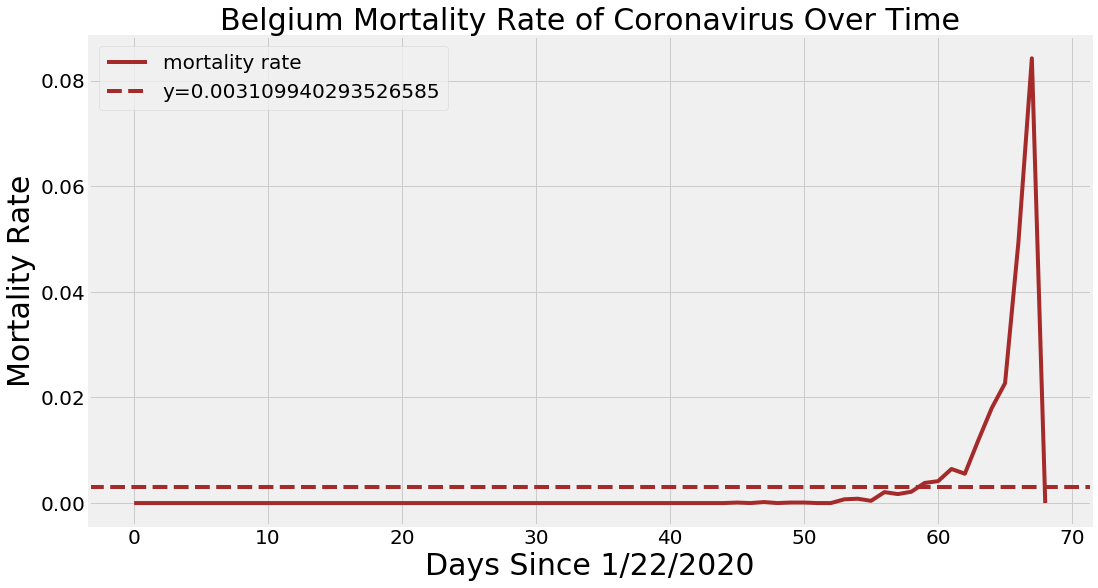

In [61]:
b_case = []
for i in range(len(mortality_rate_b)-1,-1,-1):
    b_case.append(mortality_rate_b[i])
b_case_mean = np.mean(b_case)
print(b_case_mean)
days = [i for i in range(len(dates))]
days = np.array(days)
plt.figure(figsize=(16, 9))
plt.plot(days, b_case, color='brown', label='Belgium_case')
plt.axhline(y = b_case_mean,linestyle='--', color='brown')
plt.title('Belgium Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(b_case_mean)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [2]:
df_basic = pd.read_csv('demographics.csv')

In [13]:
canton = df_basic['Canton'] 
population = []
cantons = []
density = []
beds = []
bedsPerCapita = []
inflaction = []
for i in range(len(canton)):
    cantons.append(df_basic.loc[i]['Canton'])
    population.append(float(df_basic.loc[i]['Population']))
    density.append(df_basic.loc[i]['Density'])
    beds.append(df_basic.loc[i]['Beds'])
    bedsPerCapita.append(df_basic.loc[i]['BedsPerCapita'])
    inflaction.append(float(df_basic.loc[i]['Inflaction']))


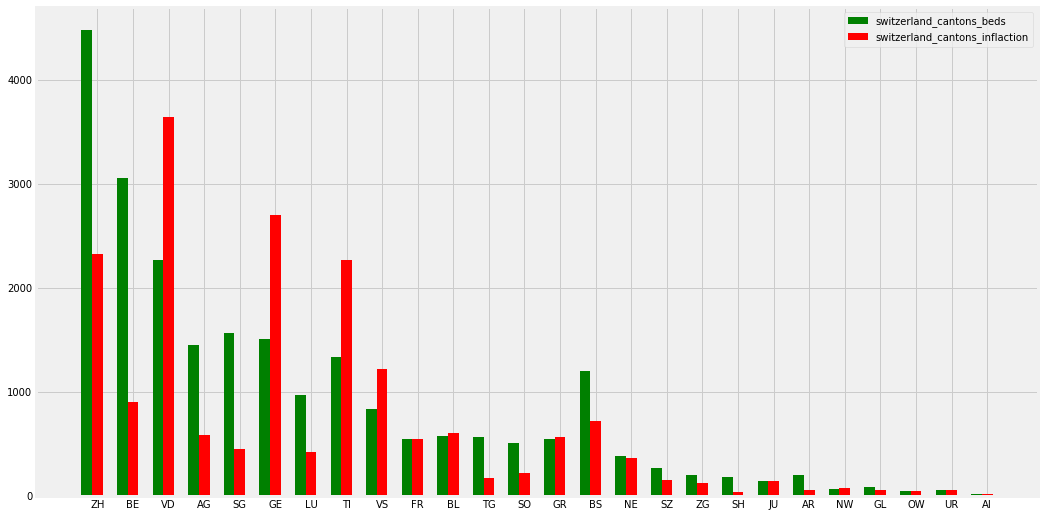

In [26]:
plt.figure(figsize=(16, 9))
x = list(range(len(cantons)))
width = 0.3
plt.bar(x, beds, width=width, label='switzerland_cantons_beds',fc = 'green')  
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, inflaction, width=width, label='switzerland_cantons_inflaction',tick_label = cantons,fc = 'r')  
plt.legend()  
plt.show()  

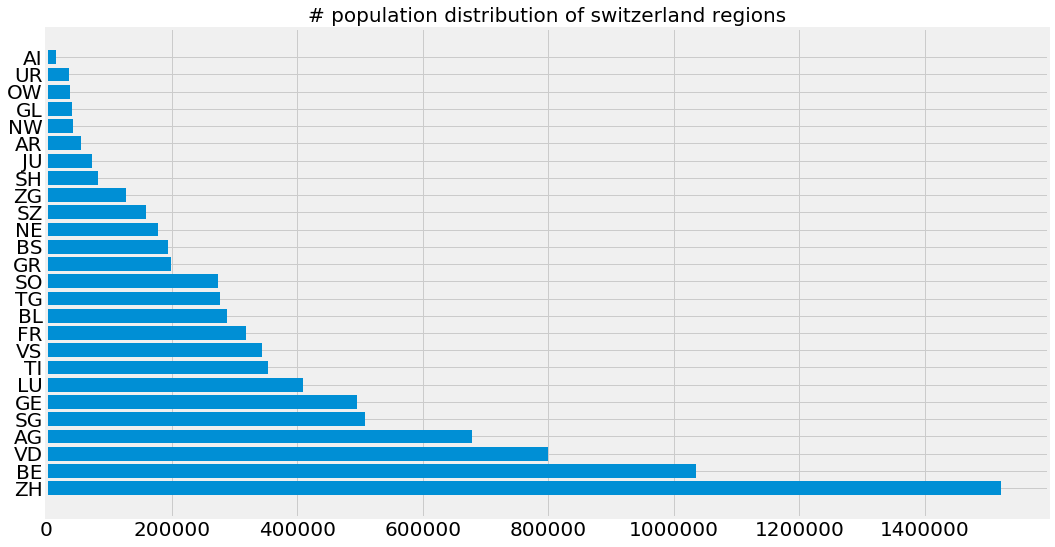

In [27]:
plt.figure(figsize=(16, 9))
plt.barh(cantons, population)
plt.title('# population distribution of switzerland regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

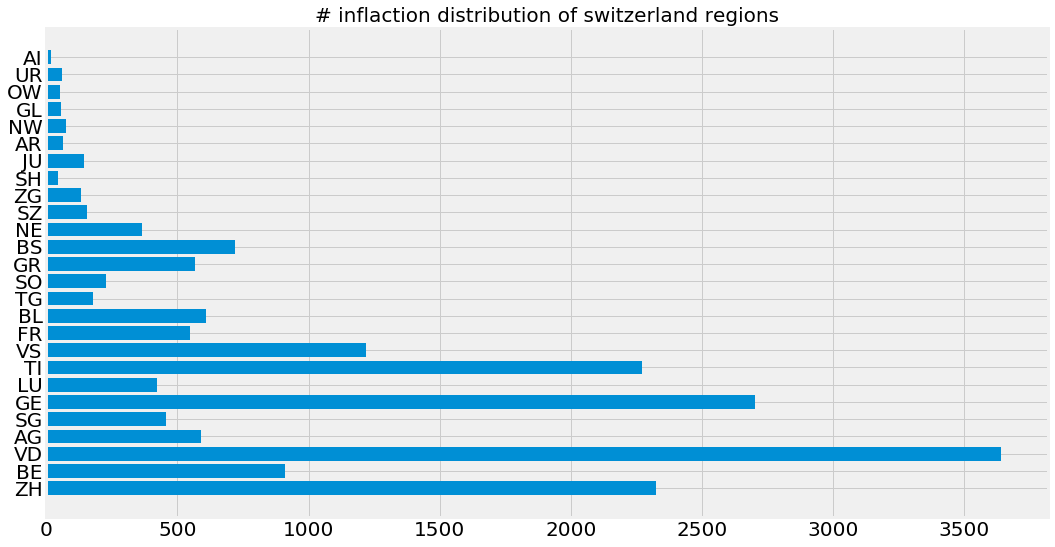

In [8]:
plt.figure(figsize=(16, 9))
plt.barh(cantons, inflaction)
plt.title('# inflaction distribution of switzerland regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

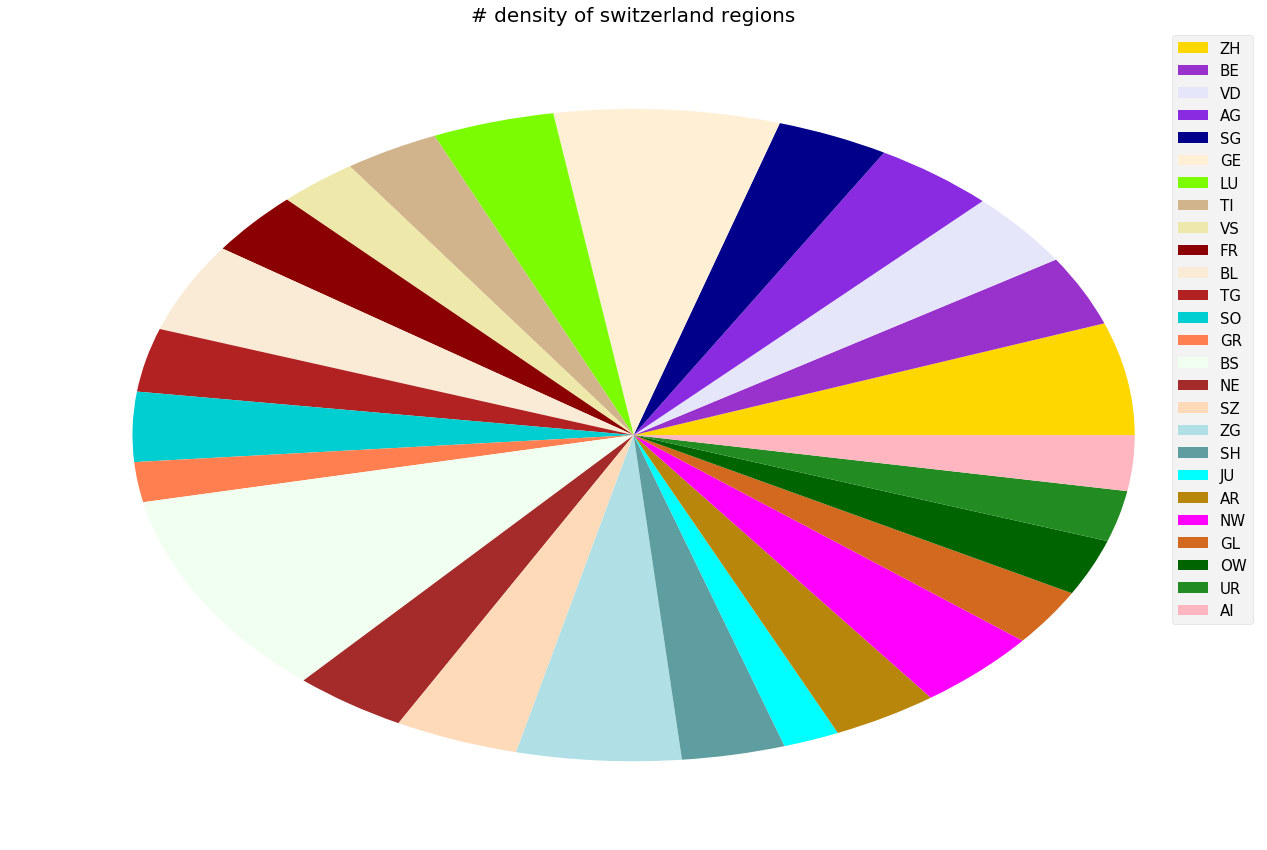

In [62]:
c = random.sample(list(mcolors.CSS4_COLORS.values()),k = len(beds))
plt.figure(figsize=(20,15))
plt.title('# density of switzerland regions', size=20)
plt.pie(density, colors=c)
plt.legend(cantons, loc='best', fontsize=15)
plt.show()

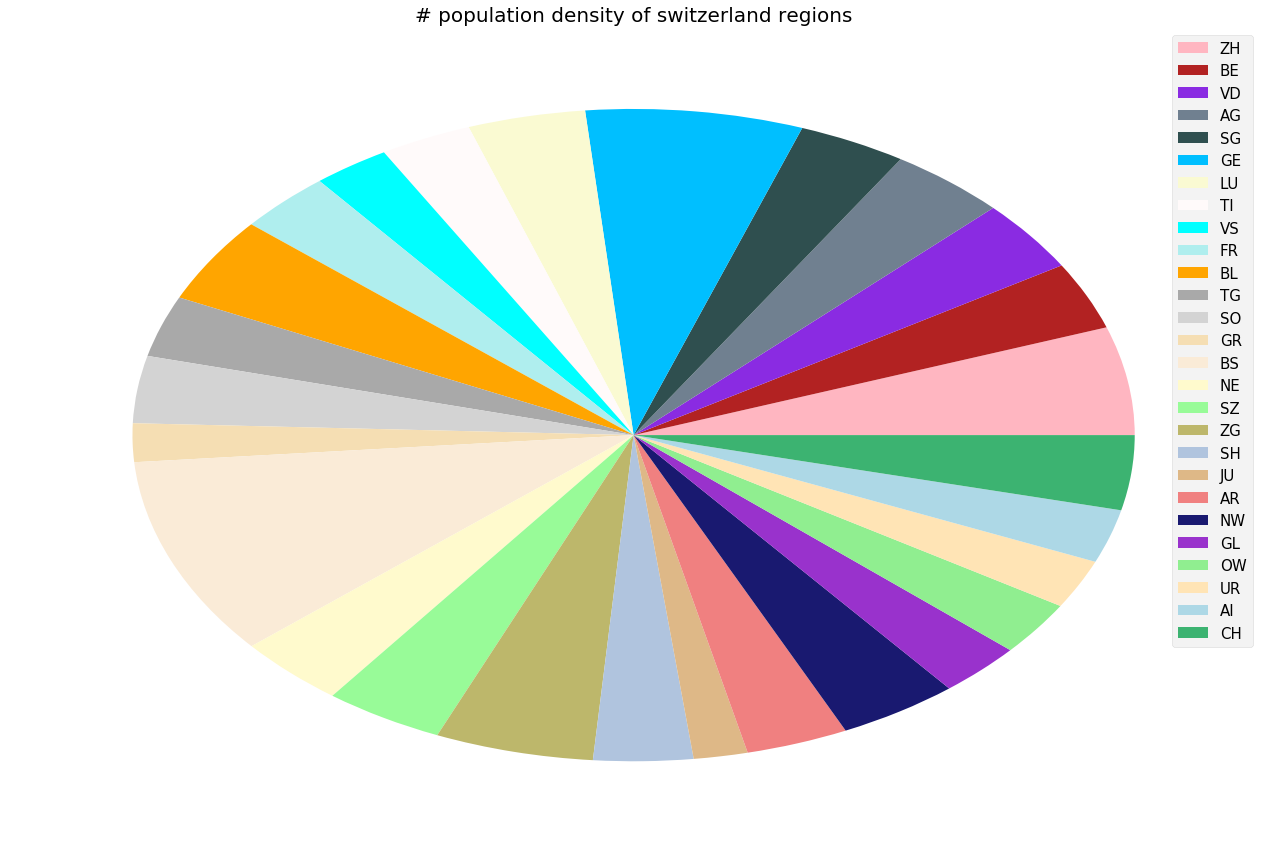

In [46]:
c = random.sample(list(mcolors.CSS4_COLORS.values()),k = len(density))
plt.figure(figsize=(20,15))
plt.title('# population density of switzerland regions', size=20)
plt.pie(density, colors=c)
plt.legend(cantons, loc='best', fontsize=15)
plt.show()


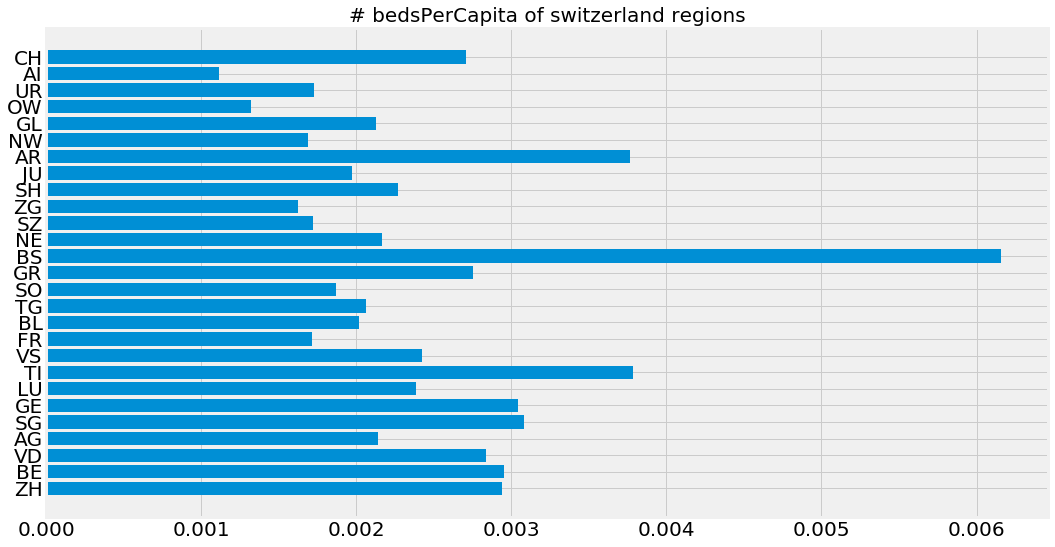

In [49]:
plt.figure(figsize=(16, 9))
plt.barh(cantons, bedsPerCapita)
plt.title('# bedsPerCapita of switzerland regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()
